# Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients’ advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on Instagram, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

Research Question
Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

# Research Question
Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose # seasonal decompose time series analysis
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

# Data Description
The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the june 2024 to may 2025. Specifically, the data covers a Facebook Ad campaign and an InstagramAd campaign. For each day of the june 2024 to may 2025, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:

Date: The date corresponding to each row of campaign data, ranging from 1 june 2024 , to  31 may 2025.

Ad Views: The number of times the ad was viewed.

Ad Clicks: The number of clicks received on the ad.

Ad Conversions: The number of conversions resulting from the ad.

Cost per Ad: The cost associated with running the Facebook ad campaign.

Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.

Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.

Cost per Click (CPC): The average cost incurred per click on the ad.

In [107]:
data=pd.read_csv("Marketing_Campaign_Data.csv")

In [108]:
data.head()
df=data
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversion,Cost Per Facebook Ad,Facebook Click-through Rate,Facebook Conversion Rate,Facebook Cost Per Click,Instagram Ad Campaign,Instagram Ad Views,Instagram Ad Clicks,Instagram Ad Conversion,Cost Per Instagram Ad,Instagram Click-through Rate,Instagram Conversion Rate,Instagram Cost Per Click
0,06-01-24,FB_JUN01,302,51,23,$110.65,0.1689,0.4510,2.17,INSTA_JUN01,220,10,3,$10.58,0.0455,0.3000,1.06
1,06-02-24,FB_JUN02,287,28,12,$55.34,0.0976,0.4286,1.98,INSTA_JUN02,508,74,34,$89.71,0.1457,0.4595,1.21
2,06-03-24,FB_JUN03,391,77,45,$147.65,0.1969,0.5844,1.92,INSTA_JUN03,452,36,12,$58.03,0.0796,0.3333,1.61
3,06-04-24,FB_JUN04,881,50,34,$67.46,0.0568,0.6800,1.35,INSTA_JUN04,886,92,34,$182.46,0.1038,0.3696,1.98
4,06-05-24,FB_JUN05,704,40,23,$50.23,0.0568,0.5750,1.26,INSTA_JUN05,366,11,5,$17.2,0.0301,0.4545,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,05-27-25,FB_MAY27,890,56,33,$97.48,0.0629,0.5893,1.74,INSTA_MAY27,928,106,31,$123.7,0.1142,0.2925,1.17
361,05-28-25,FB_MAY28,434,65,44,$139.2,0.1498,0.6769,2.14,INSTA_MAY28,984,109,53,$138.32,0.1108,0.4862,1.27
362,05-29-25,FB_MAY29,922,135,55,$207.91,0.1464,0.4074,1.54,INSTA_MAY29,503,38,17,$56.09,0.0755,0.4474,1.48
363,05-30-25,FB_MAY30,695,56,28,$87.06,0.0806,0.5000,1.55,INSTA_MAY30,654,79,30,$143.95,0.1208,0.3797,1.82


In [109]:
df.shape

(365, 17)

In [110]:
df.dtypes

Date                             object
Facebook Ad Campaign             object
Facebook Ad Views                 int64
Facebook Ad Clicks                int64
Facebook Ad Conversion            int64
Cost Per Facebook Ad             object
Facebook Click-through Rate     float64
Facebook Conversion Rate        float64
Facebook Cost Per Click         float64
Instagram Ad Campaign            object
Instagram Ad Views                int64
Instagram Ad Clicks               int64
Instagram Ad Conversion           int64
Cost Per Instagram Ad            object
Instagram Click-through Rate    float64
Instagram Conversion Rate       float64
Instagram Cost Per Click        float64
dtype: object

In [111]:
#converting datatype date as object into data_time

df['Date']=pd.to_datetime(df["Date"])

In [112]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversion,Cost Per Facebook Ad,Facebook Click-through Rate,Facebook Conversion Rate,Facebook Cost Per Click,Instagram Ad Campaign,Instagram Ad Views,Instagram Ad Clicks,Instagram Ad Conversion,Cost Per Instagram Ad,Instagram Click-through Rate,Instagram Conversion Rate,Instagram Cost Per Click
0,2024-06-01,FB_JUN01,302,51,23,$110.65,0.1689,0.4510,2.17,INSTA_JUN01,220,10,3,$10.58,0.0455,0.3000,1.06
1,2024-06-02,FB_JUN02,287,28,12,$55.34,0.0976,0.4286,1.98,INSTA_JUN02,508,74,34,$89.71,0.1457,0.4595,1.21
2,2024-06-03,FB_JUN03,391,77,45,$147.65,0.1969,0.5844,1.92,INSTA_JUN03,452,36,12,$58.03,0.0796,0.3333,1.61
3,2024-06-04,FB_JUN04,881,50,34,$67.46,0.0568,0.6800,1.35,INSTA_JUN04,886,92,34,$182.46,0.1038,0.3696,1.98
4,2024-06-05,FB_JUN05,704,40,23,$50.23,0.0568,0.5750,1.26,INSTA_JUN05,366,11,5,$17.2,0.0301,0.4545,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-05-27,FB_MAY27,890,56,33,$97.48,0.0629,0.5893,1.74,INSTA_MAY27,928,106,31,$123.7,0.1142,0.2925,1.17
361,2025-05-28,FB_MAY28,434,65,44,$139.2,0.1498,0.6769,2.14,INSTA_MAY28,984,109,53,$138.32,0.1108,0.4862,1.27
362,2025-05-29,FB_MAY29,922,135,55,$207.91,0.1464,0.4074,1.54,INSTA_MAY29,503,38,17,$56.09,0.0755,0.4474,1.48
363,2025-05-30,FB_MAY30,695,56,28,$87.06,0.0806,0.5000,1.55,INSTA_MAY30,654,79,30,$143.95,0.1208,0.3797,1.82


In [113]:
#describe
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversion,Facebook Click-through Rate,Facebook Conversion Rate,Facebook Cost Per Click,Instagram Ad Views,Instagram Ad Clicks,Instagram Ad Conversion,Instagram Click-through Rate,Instagram Conversion Rate,Instagram Cost Per Click
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2024-11-30 00:00:00.000000256,592.860274,73.128767,39.989041,0.123709,0.544731,1.753123,593.29863,53.243836,20.928767,0.089018,0.388662,1.500000
min,2024-06-01 00:00:00,200.000000,12.000000,4.000000,0.048400,0.333300,1.000000,200.00000,8.000000,2.000000,0.029300,0.222200,1.000000
25%,2024-08-31 00:00:00,375.000000,41.000000,22.000000,0.086400,0.458300,1.390000,395.00000,28.000000,11.000000,0.059600,0.333300,1.230000
50%,2024-11-30 00:00:00,598.000000,65.000000,33.000000,0.122200,0.550000,1.750000,589.00000,43.000000,18.000000,0.089300,0.393900,1.510000
75%,2025-03-01 00:00:00,808.000000,99.000000,54.000000,0.157100,0.625000,2.110000,783.00000,75.000000,30.000000,0.118400,0.439000,1.760000
max,2025-05-31 00:00:00,999.000000,194.000000,127.000000,0.199100,0.695700,2.490000,997.00000,139.000000,59.000000,0.148400,0.489800,2.000000
std,NaN,238.371477,40.544811,23.426173,0.043567,0.091412,0.412157,230.84194,30.988623,12.719949,0.034791,0.059182,0.292427


In [114]:
#adverse --more view
#click high in face book
#checking outliers find not there ---if there outlieer we have to consider checking for 365 days
#we can use scaling (standization and normalisation)

# Comparaing campanign

In [115]:
#QLICK VS CONVERSION

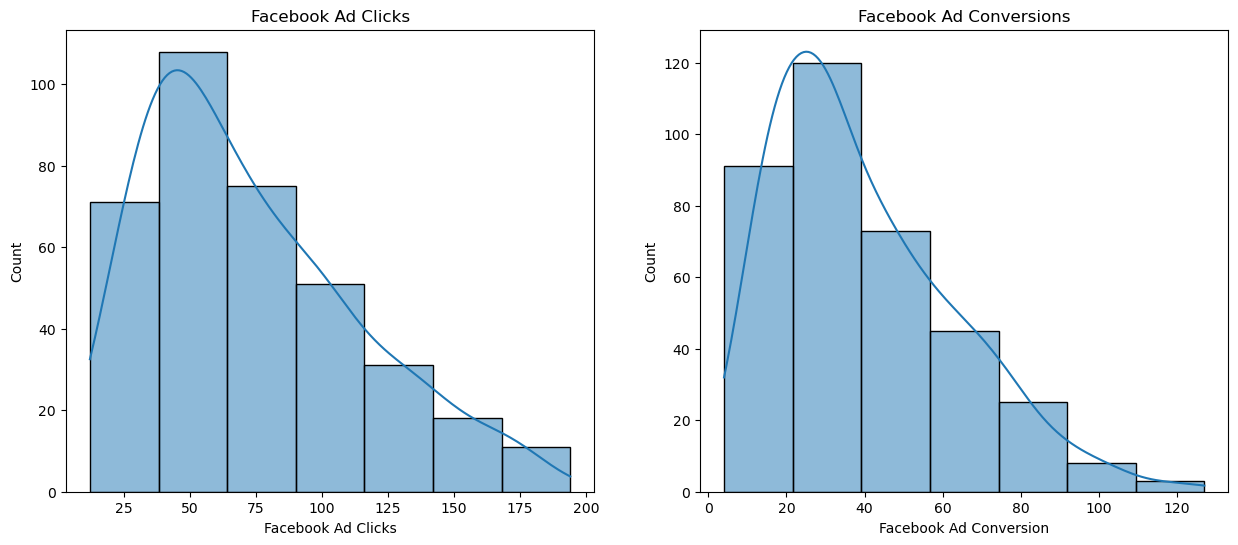

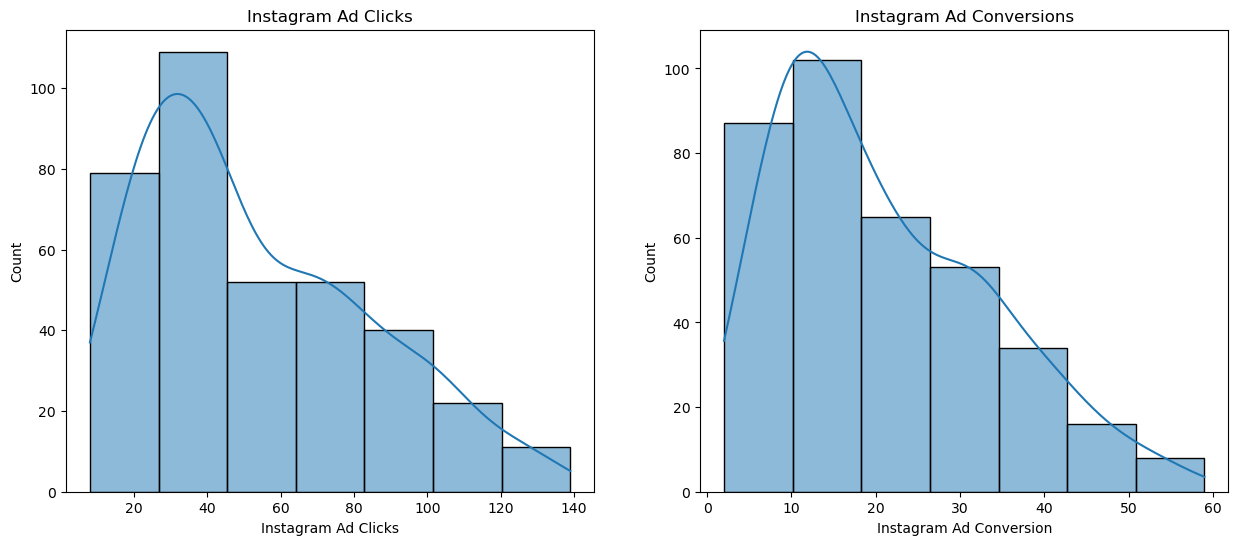

In [116]:
# distribution of the clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversion'], bins = 7, edgecolor = 'k', kde = True)  # Note: 'Conversion' not 'Conversions'
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Instagram Ad Clicks')
sns.histplot(df['Instagram Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)  # Changed from AdWords to Instagram
plt.subplot(1,2,2)
plt.title('Instagram Ad Conversions')
sns.histplot(df['Instagram Ad Conversion'], bins = 7, edgecolor = 'k', kde = True)  # Changed from AdWords to Instagram
plt.show()

In [117]:
# creating function to calculate the category for the conversions
# 365 days cmpain --which are days high conversion has happen
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('11 - 15')
        else:
            category.append('more than 15')
    return category

# applying function to different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversion')
df['Instagram Conversion Category'] = create_conversion_category('Instagram Ad Conversion')

In [118]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversion,Cost Per Facebook Ad,Facebook Click-through Rate,Facebook Conversion Rate,Facebook Cost Per Click,Instagram Ad Campaign,Instagram Ad Views,Instagram Ad Clicks,Instagram Ad Conversion,Cost Per Instagram Ad,Instagram Click-through Rate,Instagram Conversion Rate,Instagram Cost Per Click,Facebook Conversion Category,Instagram Conversion Category
0,2024-06-01,FB_JUN01,302,51,23,$110.65,0.1689,0.4510,2.17,INSTA_JUN01,220,10,3,$10.58,0.0455,0.3000,1.06,more than 15,less than 6
1,2024-06-02,FB_JUN02,287,28,12,$55.34,0.0976,0.4286,1.98,INSTA_JUN02,508,74,34,$89.71,0.1457,0.4595,1.21,11 - 15,more than 15
2,2024-06-03,FB_JUN03,391,77,45,$147.65,0.1969,0.5844,1.92,INSTA_JUN03,452,36,12,$58.03,0.0796,0.3333,1.61,more than 15,11 - 15
3,2024-06-04,FB_JUN04,881,50,34,$67.46,0.0568,0.6800,1.35,INSTA_JUN04,886,92,34,$182.46,0.1038,0.3696,1.98,more than 15,more than 15
4,2024-06-05,FB_JUN05,704,40,23,$50.23,0.0568,0.5750,1.26,INSTA_JUN05,366,11,5,$17.2,0.0301,0.4545,1.56,more than 15,less than 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-05-27,FB_MAY27,890,56,33,$97.48,0.0629,0.5893,1.74,INSTA_MAY27,928,106,31,$123.7,0.1142,0.2925,1.17,more than 15,more than 15
361,2025-05-28,FB_MAY28,434,65,44,$139.2,0.1498,0.6769,2.14,INSTA_MAY28,984,109,53,$138.32,0.1108,0.4862,1.27,more than 15,more than 15
362,2025-05-29,FB_MAY29,922,135,55,$207.91,0.1464,0.4074,1.54,INSTA_MAY29,503,38,17,$56.09,0.0755,0.4474,1.48,more than 15,more than 15
363,2025-05-30,FB_MAY30,695,56,28,$87.06,0.0806,0.5000,1.55,INSTA_MAY30,654,79,30,$143.95,0.1208,0.3797,1.82,more than 15,more than 15


In [119]:
# Display first 5 rows with selected columns
df[['Facebook Ad Conversion', 'Facebook Conversion Category',
          'Instagram Ad Conversion', 'Instagram Conversion Category']].head()



,Facebook Ad Conversion,Facebook Conversion Category,Instagram Ad Conversion,Instagram Conversion Category
0,23,more than 15,3,less than 6
1,12,11 - 15,34,more than 15
2,45,more than 15,12,11 - 15
3,34,more than 15,34,more than 15
4,23,more than 15,5,less than 6


In [120]:
pd.DataFrame(df['Facebook Conversion Category'].value_counts())

,count
Facebook Conversion Category,
more than 15,323
11 - 15,29
6 - 10,11
less than 6,2


In [121]:
# Creating same column for merging two datasets
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts().reset_index().rename(columns={'Facebook Conversion Category': 'category'}))

In [122]:
instagram = pd.DataFrame(df[ 'Instagram Conversion Category'].value_counts().reset_index().rename(columns={'Instagram Conversion Category': 'category'}))

In [123]:
category_df=pd.merge(facebook,instagram,on="category",how='outer').fillna(0)

In [124]:
category_df
#first one face book hence it is count_x

,category,count_x,count_y
0,more than 15,323,211
1,11 - 15,29,67
2,6 - 10,11,59
3,less than 6,2,28


In [125]:
category_df=category_df.rename(columns={"count_x":"Facebook"})
category_df=category_df.rename(columns={"count_y":"Instagram"})

In [126]:
category_df

,category,Facebook,Instagram
0,more than 15,323,211
1,11 - 15,29,67
2,6 - 10,11,59
3,less than 6,2,28


In [127]:
#-ordering raw in ascending

category_df = category_df.iloc[[3, 1, 0, 2]] #actually happening shifting using this iloc eg--raw 3 come as in 1
category_df

,category,Facebook,Instagram
3,less than 6,2,28
1,11 - 15,29,67
0,more than 15,323,211
2,6 - 10,11,59


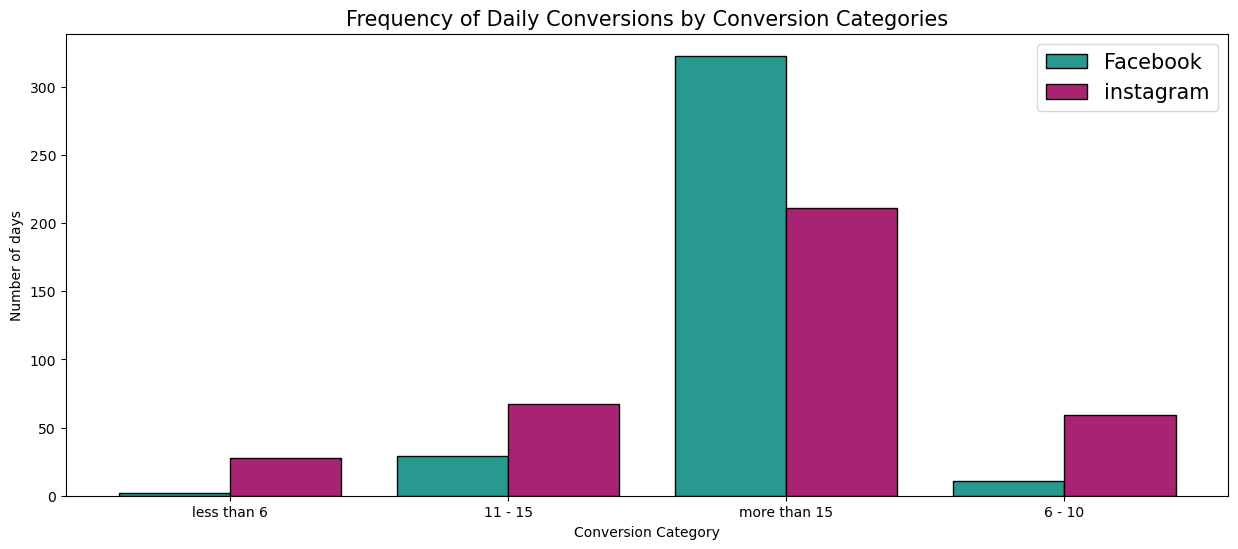

In [129]:
import numpy as np
import matplotlib.pyplot as plt

X_axis = np.arange(len(category_df))
plt.figure(figsize=(15, 6))

# Create side-by-side bars
plt.bar(X_axis - 0.2, category_df['Facebook'], width=0.4, label='Facebook', color='#28998E', linewidth=1, edgecolor='k')
plt.bar(X_axis + 0.2, category_df['Instagram'], width=0.4, label='instagram', color='#A82372', linewidth=1, edgecolor='k')

plt.xticks(X_axis, category_df['category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of days")
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize=15)
plt.legend(fontsize=15)
plt.show()

## Do more clicks on the ad really lead more sales?

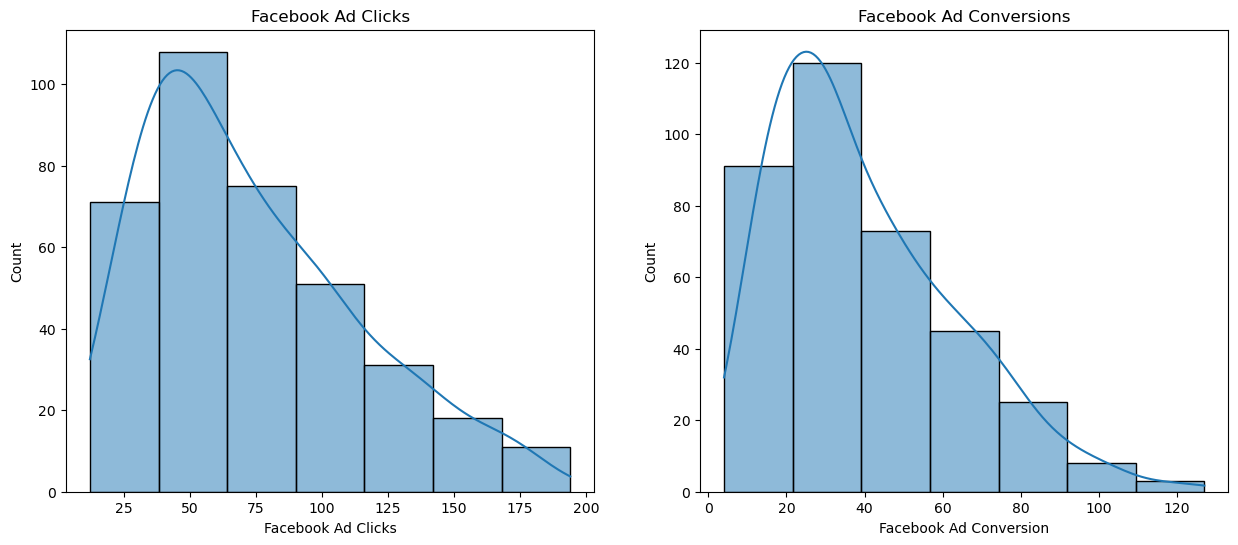

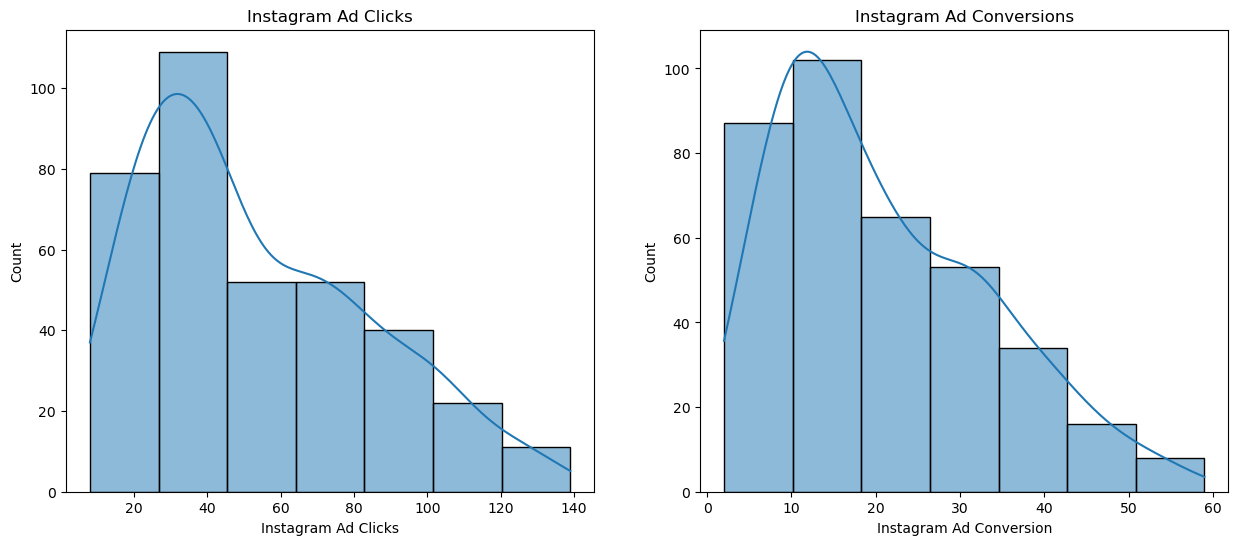

In [130]:
# distribution of the clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversion'], bins = 7, edgecolor = 'k', kde = True)  # Note: 'Conversion' not 'Conversions'
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Instagram Ad Clicks')
sns.histplot(df['Instagram Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)  # Changed from AdWords to Instagram
plt.subplot(1,2,2)
plt.title('Instagram Ad Conversions')
sns.histplot(df['Instagram Ad Conversion'], bins = 7, edgecolor = 'k', kde = True)  # Changed from AdWords to Instagram
plt.show()

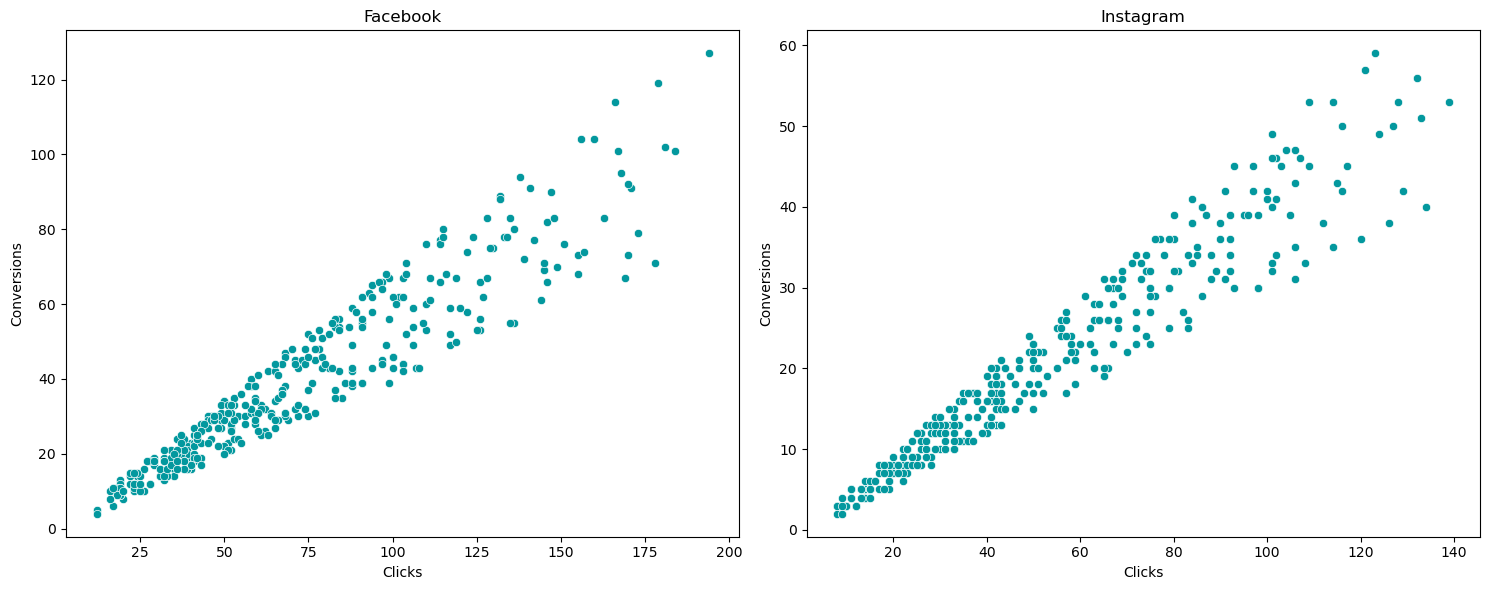

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))

# Facebook scatter plot
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversion'], color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

# If you have AdWords columns (not listed in your provided columns)
plt.subplot(1,2,2)
plt.title('Instagram')  # Based on your provided columns
sns.scatterplot(x=df['Instagram Ad Clicks'], y=df['Instagram Ad Conversion'], color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.tight_layout()
plt.show()



In [132]:
# Calculate correlations(between Ad_conversion and Ad_Click)
instagram_corr = df[['Instagram Ad Conversion', 'Instagram Ad Clicks']].corr()
instagram_corr

,Instagram Ad Conversion,Instagram Ad Clicks
Instagram Ad Conversion,1.000000,0.961974
Instagram Ad Clicks,0.961974,1.000000


In [ ]:
 df[['Facebook Ad Conversion', 'Facebook Ad Clicks']]

In [137]:

facebook_corr = df[['Facebook Ad Conversion', 'Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversion,Facebook Ad Clicks
Facebook Ad Conversion,1.000000,0.944693
Facebook Ad Clicks,0.944693,1.000000


In [134]:
print('Correlation Coef \n---')
print('Facebook : ', round(facebook_corr.values[0,1], 2))
print('Instagram : ', round(instagram_corr.values[0,1], 2))

Correlation Coef 
---
Facebook :  0.94
Instagram :  0.96


# **Interpretation:**

**Instagram (0.96):**
- A correlation coefficient of 0.96 indicates a strong positive linear relationship between clicks on Instagram ads and sales. This suggests that as the number of clicks on Instagram ads increases, sales tend to increase as well.
- This strong correlation suggests that Instagram ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Instagram ads.
- The strong correlation between clicks on Facebook ads and sales suggests that Instagram advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.

**Facebook (0.94):**
- A correlation coefficient of 0.94 indicates a  positive linear relationship between clicks on Instagram ads and sales. While there is still a positive relationship, it is almost as strong as with Instagram ads.
- The moderate correlation between clicks on Instagram ads and sales indicates that while Instagram advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize Instagram campaigns accordingly.

# # **Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on Instagram.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and Instagram, or the number of conversions from Instagram is greater than or equal to those from Facebook.

**H0: μ_Facebook ≤ μ_Instagram**

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from Instagram.

**H1: μ_Facebook > μ_instagram**

In [135]:
print("Mean Conversion \n---")
print("Facebook :", round(df['Facebook Ad Conversion'].mean(), 2))
print("Instagram :", round(df['Instagram Ad Conversion'].mean(), 2))

# Independent t-test (Welch's t-test since equal_var=False)
t_stats, p_value = st.ttest_ind(
    a=df['Facebook Ad Conversion'], 
    b=df['Instagram Ad Conversion'], 
    equal_var=False,
    alternative='greater'  # For one-tailed test: Facebook > Instagram
)

print("\nt-statistic:", round(t_stats, 4), "\np-value:", round(p_value, 4))

# Comparing the p-value with the significance level of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
    print("Conclusion: Facebook has significantly more conversions than Instagram")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")
    print("Conclusion: No evidence that Facebook has more conversions than Instagram")

Mean Conversion 
---
Facebook : 39.99
Instagram : 20.93

t-statistic: 13.6606 
p-value: 0.0

p-value is less than significance value, Reject the null hypothesis
Conclusion: Facebook has significantly more conversions than Instagram


# Regression Analysis

 Research Question: What will happen when I go with the Facebook Ad? 
 How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

Accuracy (R2 Score): 89.24 %
Mean Squared Error: 58.86
Intercept: 0.07
Coefficient: 0.5458


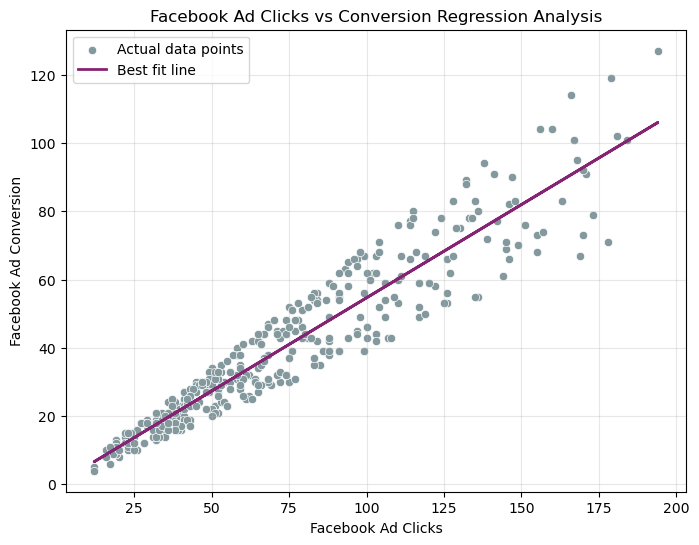


Predictions:
For 50 Clicks, Expected Conversion: 27.36
For 80 Clicks, Expected Conversion: 43.74
For 100 Clicks, Expected Conversion: 54.66


In [136]:

# Independent variable (Facebook Ad Clicks)
X = df[['Facebook Ad Clicks']]
# Dependent variable (Facebook Ad Conversion)
y = df['Facebook Ad Conversion']

# Initialize and fit Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X, y)
prediction = reg_model.predict(X)

# Model evaluation

r2 = r2_score(y, prediction) * 100  # Convert to percentage
mse = mean_squared_error(y, prediction)

print('Accuracy (R2 Score):', round(r2, 2), '%')
print('Mean Squared Error:', round(mse, 2))
print('Intercept:', round(reg_model.intercept_, 2))
print('Coefficient:', round(reg_model.coef_[0], 4))

# Visualize the regression

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversion'], 
                color='#83999E', label='Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color='#862372', 
         label='Best fit line', linewidth=2)
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversion')
plt.title('Facebook Ad Clicks vs Conversion Regression Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Make predictions for specific click values
print(f"\nPredictions:")
print(f'For 50 Clicks, Expected Conversion: {round(reg_model.predict([[50]])[0], 2)}')
print(f'For 80 Clicks, Expected Conversion: {round(reg_model.predict([[80]])[0], 2)}')
print(f'For 100 Clicks, Expected Conversion: {round(reg_model.predict([[100]])[0], 2)}')